In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [5]:
df = pd.read_csv("./DATASETS/spam.csv", encoding='latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df = df[["v1", 'v2']]

In [8]:
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.columns = ['label', 'text']

In [10]:
df.label = df.label.map({"ham": 0, "spam": 1})

C:\Users\yashr\AppData\Local\Temp\ipykernel_7592\3443668074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label = df.label.map({"ham": 0, "spam": 1})


In [11]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.2)

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [16]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [19]:
predictions = model.predict(X_test_tfidf)

In [20]:
accuracy = accuracy_score(y_test, predictions)

Accuracy:  0.9748878923766816


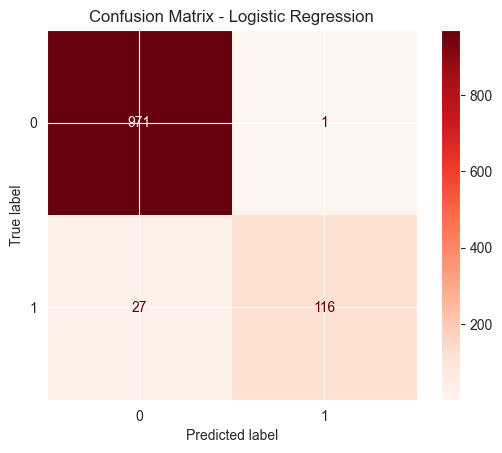

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
display =  ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
print("Accuracy: ", accuracy)
display.plot(cmap='Reds')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [25]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)


In [27]:
dl_model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [30]:
dl_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [31]:
dl_model.fit(X_train_padded, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8316 - loss: 0.4410 - val_accuracy: 0.8587 - val_loss: 0.3772
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3511 - val_accuracy: 0.8587 - val_loss: 0.3708
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3646 - val_accuracy: 0.8587 - val_loss: 0.3610
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3485 - val_accuracy: 0.8587 - val_loss: 0.3395
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3162 - val_accuracy: 0.8587 - val_loss: 0.2996
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.2669 - val_accuracy: 0.8868 - val_loss: 0.2172
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9191 - loss: 0.1960 - val_accuracy: 0.9417 - val_loss: 0.1504
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1385 - val_accuracy: 0.

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


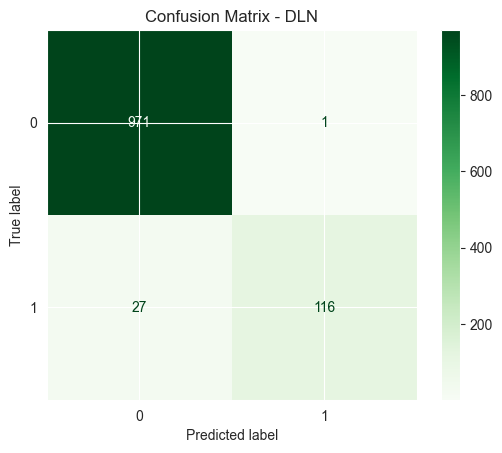

DL Model Accuracy: 0.9811659192825112


In [36]:
y_pred_dl = (dl_model.predict(X_test_padded) > 0.5).astype("int32")
dl_accuracy = accuracy_score(y_test, y_pred_dl)
display_dl =  ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
display_dl.plot(cmap='Greens')
plt.title('Confusion Matrix - DLN')
plt.show()
print("DL Model Accuracy:", accuracy_score(y_test, y_pred_dl))